# 数据预处理

In [1]:
#创建了一个人工数据集，并写入csv文件
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,1060000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [2]:
#从创建的csv文件中加载数据集
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley    Price
0       NaN  Pave   127500
1       2.0   NaN  1060000
2       4.0   NaN   178100
3       NaN   NaN   140000


In [3]:
#处理缺失的数据，这里使用插值
inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]#此处拿出前两列作为input，0：2不含2
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [4]:
#对于inputs中的类别值或离散值， 我们将nan视为一个类别
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [5]:
#现在已经把inputs中和outputs中所有条目转换为数值格式，因此可以转换位张量
import torch
x,y = torch.tensor(inputs.values),torch.tensor(outputs.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([ 127500, 1060000,  178100,  140000]))

## 测试一些list的技巧

In [6]:
#list的推导式：(其他方式还有：基本语法，range，list)
a = [x*2 for x in range(100) if x%9==0]
a

[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198]

In [3]:
#list的增加（不限制元素类型）：append原地，+产生新的对象，extend原地,insert指定位置
a = [10,20,30,40]
a.insert(2,100)
a*3#乘法扩展

[10, 20, 100, 30, 40, 10, 20, 100, 30, 40, 10, 20, 100, 30, 40]

In [13]:
#list的删除：del数据往前拷贝，pop删除并返回指定位置元素, remove首次元素
a = [1,2,3,4]
del a[1]
a.pop(1)
a.remove(1)
a
#a.index(20,3)表示从3开始搜索20，返回其索引
#a.count(20)获取20出现的次数


[4]

In [28]:
#list排序---不建立新列表
a = [1,2,3,4,0]
a.sort(reverse=True)
import random
random.shuffle(a)
a.reverse()#切片一样逆序a[::-1]
a

[1, 0, 4, 3, 2]

In [23]:
#建立新列表的排序
a = [2,1,3,4,0]
a = sorted(a,reverse = True)
a

[4, 3, 2, 1, 0]

## 元组tuple

In [2]:
#创建,元组不可更改增加删除
a = (1,2,3,4)
a= 0,
type(a)
b = tuple("abcd")
del(b)
s = (a*2 for a in range(5))
s.__next__()


0

## 字典

In [11]:
#建立字典{}，dict()
a = {'name':'yq','age':'18'}
a = dict(name = 'yq',age = 18,fine = [1,2,3])
a.get('name')
a.items()
a.values()
a['job'] = 'pro'
a 

{'name': 'yq', 'age': 18, 'fine': [1, 2, 3], 'job': 'pro'}

# 测试自动微分

In [8]:
#如果两次使用backward会报错，因为grad已经使用了
import torch
x = torch.arange(4.0, requires_grad=True)
y = 2*torch.dot(x,x)
y.backward(retain_graph=True)#用于两次使用backward函数
x.grad
y.backward()
x.grad

tensor([ 0.,  8., 16., 24.])

In [22]:
#测试控制流计算梯度
def f(a):
    b = 2*abs(a)
    while b.norm()<100:
        b*=2
    return b
a = torch.randn(size=(3,1),requires_grad=True)
print(a.shape)
print("a:",a)
b = f(a)
print(b.shape)
print("b:",b)
b.sum().backward()
print("梯度",a.grad)

torch.Size([3, 1])
a: tensor([[-1.3702],
        [-0.6998],
        [-2.6625]], requires_grad=True)
torch.Size([3, 1])
b: tensor([[ 87.6942],
        [ 44.7853],
        [170.4012]], grad_fn=<MulBackward0>)
梯度 tensor([[-64.],
        [-64.],
        [-64.]])


y: torch.Size([100])
x: torch.Size([100])
grad: torch.Size([100])


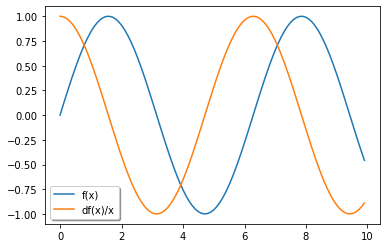

In [55]:
#f(x)=sin(x),绘制f和导数的图像
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0.,10.,0.1, requires_grad=True)
y = torch.sin(x)
print("y:",y.shape)
y.backward(gradient=torch.ones(len(x)))
print("x:",x.shape)
print("grad:",x.grad.shape)
plt.plot(x.detach(),y.detach(),label='f(x)')#需要把梯度值剔除，才能画图
plt.plot(x.detach(),x.grad,label='df(x)/x')#需要把梯度值剔除，才能画图
plt.legend(shadow=True)
plt.show()


In [73]:
help(torch.detach)

Help on built-in function detach:

detach(...)

